In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Common Part for Question3**

In [2]:
#Library to load Dataset
from scipy.io import loadmat
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library for SVM - Support Vector Machine
from sklearn import svm
#Library to save the models using Joblib
from sklearn.externals import joblib 
#To measure the accuracy
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#Loading the Dataset1
data_1 = loadmat('/content/dataset_b.mat')
print(data_1)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 29 10:42:25 2020', '__version__': '1.0', '__globals__': [], 'samples': array([[-0.40292263, -2.53686382],
       [ 0.64995013, -1.11154975],
       [-1.80491856,  0.42360053],
       ...,
       [-0.75600214, -1.45586119],
       [-1.41251325, -1.98495853],
       [-0.86610415,  0.54620991]]), 'labels': array([[1, 1, 0, ..., 0, 2, 2]])}


In [4]:
#Printing the keys of Data
print(data_1.keys())
#Printing the samples of Data
print(data_1['samples'])
#Printing the labels of the Data
print(data_1['labels'])
#Printing the length of the Data
print(len(data_1))

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])
[[-0.40292263 -2.53686382]
 [ 0.64995013 -1.11154975]
 [-1.80491856  0.42360053]
 ...
 [-0.75600214 -1.45586119]
 [-1.41251325 -1.98495853]
 [-0.86610415  0.54620991]]
[[1 1 0 ... 0 2 2]]
5


In [5]:
#Printing the shape and type of the samples and labels from Dataset1
x_1 = data_1['samples']
y_1 = data_1['labels']
print("Samples Data Type",x_1.dtype)
print("Label Data Type",y_1.dtype)
print("Shape of Samples", x_1.shape)
print("Shape of Label", y_1.shape)

Samples Data Type float64
Label Data Type int64
Shape of Samples (10000, 2)
Shape of Label (1, 10000)


In [6]:
#Convert to DataFrame
sample_x = x_1[:,0]
sample_y = x_1[:,1]
label = y_1[0]
data_frame = pd.DataFrame(list(zip(sample_x,sample_y,label)), columns=["Sample_X","Sample_Y","Label"])
print(data_frame)

      Sample_X  Sample_Y  Label
0    -0.402923 -2.536864      1
1     0.649950 -1.111550      1
2    -1.804919  0.423601      0
3    -1.876260 -0.375801      2
4    -0.879205  0.064968      0
...        ...       ...    ...
9995 -1.035924 -0.082166      0
9996 -0.443304  0.170967      0
9997 -0.756002 -1.455861      0
9998 -1.412513 -1.984959      2
9999 -0.866104  0.546210      2

[10000 rows x 3 columns]


In [7]:
#Printing the Information about the Dataset
print(data_frame.describe())
#Printing the DataTypes of each column of the Dataset
print("The Datatypes ")
print(data_frame.dtypes)

           Sample_X      Sample_Y         Label
count  10000.000000  10000.000000  10000.000000
mean      -0.331894     -0.344799      0.998600
std        1.161479      1.419375      0.816618
min       -3.614775     -5.389351      0.000000
25%       -1.183421     -1.347515      0.000000
50%       -0.601324     -0.439335      1.000000
75%        0.469203      0.629120      2.000000
max        3.451787      4.644333      2.000000
The Datatypes 
Sample_X    float64
Sample_Y    float64
Label         int64
dtype: object


In [8]:
#Dividing the Dataset into Samples and Labels separately after shuffling
data_y = data_frame['Label']
print(data_y)
data_x = data_frame.drop(["Label"],axis=1)
print(data_x)

0       1
1       1
2       0
3       2
4       0
       ..
9995    0
9996    0
9997    0
9998    2
9999    2
Name: Label, Length: 10000, dtype: int64
      Sample_X  Sample_Y
0    -0.402923 -2.536864
1     0.649950 -1.111550
2    -1.804919  0.423601
3    -1.876260 -0.375801
4    -0.879205  0.064968
...        ...       ...
9995 -1.035924 -0.082166
9996 -0.443304  0.170967
9997 -0.756002 -1.455861
9998 -1.412513 -1.984959
9999 -0.866104  0.546210

[10000 rows x 2 columns]


In [9]:
# joblib.dump(data_frame, 'data_Q3.pkl')
# joblib.dump(data_x, 'data_x.pkl') 

['data_x.pkl']

In [7]:
data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl') 

In [ ]:
#Printing the unique values of the Target
print(np.unique(data_1['labels'][0]))

[0 1 2]


### **Question 3a**

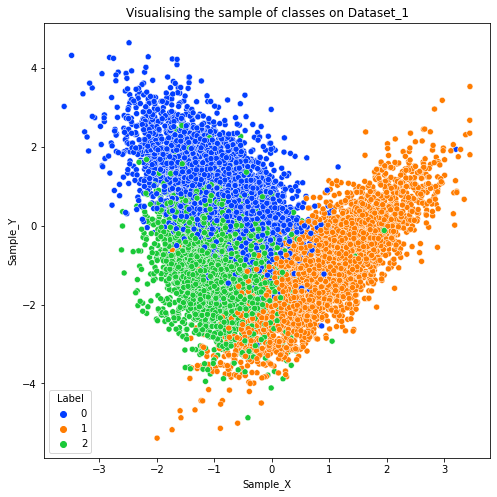

In [ ]:
def Question3a(data_frame):
  #Creating a figure of size 8*8
  plt.figure(figsize=(8,8))
  palette = sns.color_palette("bright", 3) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=data_frame, x="Sample_X",y="Sample_Y",hue = "Label",legend='full',palette=palette)
  plt.title("Visualising the sample of classes on Dataset_1")
  plt.show()

data_frame = joblib.load('/content/data_Q3.pkl')
Question3a(data_frame)

**Performing k-Fold Validation**

In [ ]:
#Function to split the Dataset into K-Folds 
def k_folds(k):
  #List to store the divided index of the training and testing data for K-Folds
  train_index = []
  test_index = []
  total_index=[]
  folds = [0]
  #Finding the point of Division
  div = int(data_x.shape[0]/k)
  total_index.extend(range(data_x.shape[0]))
  #Storing the points of division of the index
  for i in range(1,k):
    folds.append(div*i)
  folds.append(data_x.shape[0])
  #Keeping one fold of index for test and rest of the index for Train
  for i in range(len(folds)-1):
    test_list = []
    train_list = []
    test_list.extend(range(folds[i], folds[i+1]))
    train_list = list(set(total_index) - set(test_list))
    train_index.append(train_list)
    test_index.append(test_list)
  return train_index,test_index,k

In [ ]:
#accuracy method to find accuracy
def accuracy(pred,actual):
  pred = np.array(pred).reshape(pred.shape[0],1)
  actual = np.array(actual).reshape(actual.shape[0],1)
  error = pred-actual
  val = (error == 0).sum()
  #Calculate the accuracy
  accuracy = val/pred.shape[0]
  return accuracy*100


In [ ]:
#Making the Class SVM
class SVMachinemulti(object):
    def __init__(self,type_o):
      super(SVMachinemulti, self).__init__()
      self.type_o = type_o

    def ovr(self,X_train,Y_train,c,g):
      #Since there are 3 class labels
      models = [0,1,2]
      self.models_save = []
      num = 0
      for model in models:
        models_t = [0,1,2]
        models_t.remove(model)
        #Storing the X_train
        data_f = X_train.copy()
        #Making the instance 1 whose class label is model
        data_f.loc[X_train['Label'] == model, 'Label1'] = 1
        #Making the instance -1 whose class label is not model
        data_f.loc[X_train['Label'] != model, 'Label1'] = -1
        X_train_fit = data_f.drop(["Label","Label1"],axis = 1)
        Y_train_fit = data_f['Label1']  
        model = svm.SVC(kernel = 'rbf', C = c, gamma = g)
        #Calling the fit from SVM
        model.fit(X_train_fit, Y_train_fit)
        self.models_save.append(model)

    def ovo(self,X_train,Y_train,c,g):
      self.models_save = []
      num = 0
      #Since there are 3 labels
      models = [0,1]
      reference = [1,2]
      #Iterating over the nc2 models created 01,02,12
      for model in models:
        for ref in reference:
          if ref > model:
            #Storing the X_train
            data_f = X_train.copy()
            #Storing the instances where the label is whether model or ref
            data = data_f.loc[data_f['Label'].isin([model,ref])]
            data = data.reset_index(drop=True)
            #Making the instance 0 whose class label is model
            data.loc[data['Label'] == model, 'Label'] = 0
            #Making the instance 1 whose class label is reference
            data.loc[data['Label'] == ref, 'Label'] = 1
            X_train_fit = data.drop(["Label"],axis=1)
            Y_train_fit = data['Label']  
            model = svm.SVC(kernel = 'rbf', C = c, gamma = g)
            #Calling the fit from SVM
            model.fit(X_train_fit, Y_train_fit)
            self.models_save.append(model)

    #predict function
    def predict(self,X_test):
      #If type is ovr
      if(self.type_o == 'ovr'):
        data_test = pd.DataFrame()
        num = 0
        #Predicting the values of the classes using the thetas passing in hypothesis function
        for i in range(len(self.models_save)):
          predict_y = self.models_save[i].decision_function(X_test)
          data_test[num] = predict_y
          num += 1
        #Getting the ID of the max probability class
        data_test = data_test.idxmax(axis = 1)
        return data_test

      #If type is ovo
      else:
        data_test = pd.DataFrame()
        num = 1
        for i in range(len(self.models_save)):
          pred_test = model_log.decision_function(X_test)
          for k in range(len(pred_test)):
            if pred_test[k] < 0:
              pred_test[k] = model
            else:
              pred_test[k] = ref
          data_test['Model '+ str(num)] = pred_test
          num += 1
        data_test = data_test.mode(axis = 1).loc[:,0]
        return data_test
      
    def fit(self,train_X,train_Y,c,g):
      if self.type_o == 'ovr':
        #If type is ovr call ovr function
        return self.ovr(train_X,train_Y,c,g)
      
      else:
        #If type is ovo call ovr function
        return self.ovo(train_X,train_Y,c,g)

    def support_vector(self):
      return self.model.support_vectors_

### **Question 3b**

**Grid search with model save**

In [ ]:
# def gridsearch_ovr(data_x,data_frame):
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   #Storing the models
#   Question3b_grid = []
#   c_val = [0.01,0.1,0.2,0.5,1,10,100]
#   gammas = [0.01,0.1,0.5,1]
#   best_c = []
#   best_g = []
#   best_acc = 0
#   c_value = 0
#   g_value = 0
#   for i in range(fold):
#     columns_names = ["Folds","C", "Gamma","Testing Accuracy"]
#     Q3_b = pd.DataFrame(columns = columns_names)
#     for c in c_val:
#       for g in gammas:
#         #Getting the train and test data
#         data_p = data_frame.loc[test_index[i],:]
#         data_f = data_frame.loc[test_index[i],:]
#         data_p.reset_index(inplace = True,drop = True) 
#         X_train_fit = data_frame.loc[train_index[i],:]
#         X_train = data_x.loc[train_index[i],:]
#         X_test = data_x.loc[test_index[i],:]
#         Y_train = data_frame.iloc[train_index[i],-1]    
#         Y_test = data_frame.iloc[test_index[i],-1]
#         #Calling the SVM with OVR
#         model = SVMachineovr('ovr')
#         model.fit(X_train_fit,Y_train,c,g)
#         Question3b_grid.append(model)
#         #Predicting the values on the test and train data
#         pred_test = model.predict(X_test)
#         #Calculating the accuracy
#         acc_test = accuracy(pred_test,Y_test)
#         if (acc_test > best_acc):
#           c_value = c
#           g_value = g
#           best_acc = acc_test
#         Q3_b = Q3_b.append({'Folds':int(i+1),'C':c, 'Gamma':g,'Testing Accuracy':acc_test},ignore_index=True)
#     best_c.append(c_value)
#     best_g.append(g_value)
#     print(Q3_b)
#     print("The Optimal Values of C is ",c_value, "and gamma is ",g_value)
#   joblib.dump(Question3b_grid, 'Question3b_grid.pkl')
#   #returning the best lambda
#   return max(set(best_c), key = best_c.count), max(set(best_g), key = best_g.count)

# data_frame = joblib.load('/content/data_Q3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3c
# gridsearch_ovr(data_x,data_frame)

    Folds       C  Gamma  Testing Accuracy
0     1.0    0.01   0.01             76.85
1     1.0    0.01   0.10             87.65
2     1.0    0.01   0.50             88.30
3     1.0    0.01   1.00             88.20
4     1.0    0.10   0.01             87.10
5     1.0    0.10   0.10             88.10
6     1.0    0.10   0.50             88.30
7     1.0    0.10   1.00             88.40
8     1.0    0.20   0.01             87.35
9     1.0    0.20   0.10             88.10
10    1.0    0.20   0.50             88.40
11    1.0    0.20   1.00             88.40
12    1.0    0.50   0.01             87.55
13    1.0    0.50   0.10             88.20
14    1.0    0.50   0.50             88.40
15    1.0    0.50   1.00             88.40
16    1.0    1.00   0.01             87.90
17    1.0    1.00   0.10             88.15
18    1.0    1.00   0.50             88.40
19    1.0    1.00   1.00             88.45
20    1.0   10.00   0.01             87.95
21    1.0   10.00   0.10             88.20
22    1.0  

(10, 0.5)

**Grid search with load Model**

In [ ]:
def gridsearch_ovr(data_x,data_frame):
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  #iterating Values
  c_val = [0.01,0.1,0.2,0.5,1,10,100]
  gammas = [0.01,0.1,0.5,1]
  best_c = []
  best_g = []
  best_acc = 0
  c_value = 0
  g_value = 0
  num = 0
  model = joblib.load('/content/Question3b_grid.pkl')
  for i in range(fold):
    columns_names = ["Folds","C", "Gamma","Testing Accuracy"]
    Q3_b = pd.DataFrame(columns = columns_names)
    for c in c_val:
      for g in gammas:
        #Getting the train and test data
        data_p = data_frame.loc[test_index[i],:]
        data_f = data_frame.loc[test_index[i],:]
        data_p.reset_index(inplace = True,drop = True) 
        X_train_fit = data_frame.loc[train_index[i],:]
        X_train = data_x.loc[train_index[i],:]
        X_test = data_x.loc[test_index[i],:]
        Y_train = data_frame.iloc[train_index[i],-1]    
        Y_test = data_frame.iloc[test_index[i],-1]
        #Calling the SVM with OVR
        #Predicting the values on the test and train data
        pred_test = model[num].predict(X_test)
        num += 1
        #Calculating the accuracy
        acc_test = accuracy(pred_test,Y_test)
        if (acc_test > best_acc):
          c_value = c
          g_value = g
          best_acc = acc_test
        Q3_b = Q3_b.append({'Folds':int(i+1),'C':c, 'Gamma':g,'Testing Accuracy':acc_test},ignore_index=True)
    best_c.append(c_value)
    best_g.append(g_value)
    print(Q3_b)
    print("The Optimal Values of C is ",c_value, "and gamma is ",g_value)
    #returning the best lambda
  return max(set(best_c), key = best_c.count), max(set(best_g), key = best_g.count)

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3c
gridsearch_ovr(data_x,data_frame)

    Folds       C  Gamma  Testing Accuracy
0     1.0    0.01   0.01             76.85
1     1.0    0.01   0.10             87.65
2     1.0    0.01   0.50             88.30
3     1.0    0.01   1.00             88.20
4     1.0    0.10   0.01             87.10
5     1.0    0.10   0.10             88.10
6     1.0    0.10   0.50             88.30
7     1.0    0.10   1.00             88.40
8     1.0    0.20   0.01             87.35
9     1.0    0.20   0.10             88.10
10    1.0    0.20   0.50             88.40
11    1.0    0.20   1.00             88.40
12    1.0    0.50   0.01             87.55
13    1.0    0.50   0.10             88.20
14    1.0    0.50   0.50             88.40
15    1.0    0.50   1.00             88.40
16    1.0    1.00   0.01             87.90
17    1.0    1.00   0.10             88.15
18    1.0    1.00   0.50             88.40
19    1.0    1.00   1.00             88.45
20    1.0   10.00   0.01             87.95
21    1.0   10.00   0.10             88.20
22    1.0  

(10, 0.5)

**Question 3b OVR Model save**

In [ ]:
# def Question3b(data_x,data_frame):
#   columns_names = ["Folds","Testing Accuracy"]
#   Q3_b = pd.DataFrame(columns = columns_names)
#   columns_names_1 = ["Folds","Class","Classwise Accuracy"]
#   Q3_b1 = pd.DataFrame(columns = columns_names_1)
#   #Performing Grid Search
#   c_val,g_val = gridsearch_ovr(data_x,data_frame)
#   print("The optimal values of C and gamma obtained are ",c_val,g_val)
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   sum_acc = 0
#   class_acc = [0,0,0]
#   #Storing the models
#   Question3b_ovr = []
#   for i in range(fold):
#     #Getting the train and test data
#     data_p = data_frame.loc[test_index[i],:]
#     data_f = data_frame.loc[test_index[i],:]
#     data_p.reset_index(inplace = True,drop = True) 
#     X_train_fit = data_frame.loc[train_index[i],:]
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1]
#     #Calling the SVM with OVR
#     model = SVMachineovr('ovr')
#     model.fit(X_train_fit,Y_train,c_val,g_val)
#     Question3b_ovr.append(model)
#     #Predicting the values on the test and train data
#     pred_test = model.predict(X_test)
#     #printing the classwise accuracy
#     classes = [0,1,2]
#     for class_m in classes:
#       pred = pred_test.loc[data_p['Label'].isin([class_m])]
#       actual = Y_test.loc[data_f['Label'].isin([class_m])]
#       acc = accuracy(pred,actual)
#       class_acc[class_m] += acc
#       Q3_b1 = Q3_b1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
#     #Calculating the accuracy
#     acc_test = accuracy(pred_test,Y_test)
#     sum_acc += acc_test
#     Q3_b = Q3_b.append({'Folds':int(i+1),'Testing Accuracy':acc_test},ignore_index=True)
#   mean_acc = sum_acc/5
#   class_acc = [num/5 for num in class_acc]

#   print("Accuracy for each fold")
#   print(Q3_b)
#   print("The mean accuracy is ", mean_acc)
#   print("\n Classwise Accuracy")
#   print(Q3_b1)
#   print("The mean accuracy for each class is ")
#   for i in range(3):
#     print("Class ",i,"-" ,class_acc[i])
#   joblib.dump(Question3b_ovr, 'Question3b_ovr.pkl')

# data_frame = joblib.load('/content/data_Q3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3b
# Question3b(data_x,data_frame)

    Folds       C  Gamma  Testing Accuracy
0     1.0    0.01   0.01             76.85
1     1.0    0.01   0.10             87.65
2     1.0    0.01   0.50             88.30
3     1.0    0.01   1.00             88.20
4     1.0    0.10   0.01             87.10
5     1.0    0.10   0.10             88.10
6     1.0    0.10   0.50             88.30
7     1.0    0.10   1.00             88.40
8     1.0    0.20   0.01             87.35
9     1.0    0.20   0.10             88.10
10    1.0    0.20   0.50             88.40
11    1.0    0.20   1.00             88.40
12    1.0    0.50   0.01             87.55
13    1.0    0.50   0.10             88.20
14    1.0    0.50   0.50             88.40
15    1.0    0.50   1.00             88.40
16    1.0    1.00   0.01             87.90
17    1.0    1.00   0.10             88.15
18    1.0    1.00   0.50             88.40
19    1.0    1.00   1.00             88.45
20    1.0   10.00   0.01             87.95
21    1.0   10.00   0.10             88.20
22    1.0  

**Question 3b OVR model load**

In [ ]:
def Question3b(data_x,data_frame):
  columns_names = ["Folds","Testing Accuracy"]
  Q3_b = pd.DataFrame(columns = columns_names)
  columns_names_1 = ["Folds","Class","Classwise Accuracy"]
  Q3_b1 = pd.DataFrame(columns = columns_names_1)
  c_val,g_val = gridsearch_ovr(data_x,data_frame)
  print("The optimal values of C and gamma obtained are ",c_val,g_val)
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  sum_acc = 0
  class_acc = [0,0,0]
  model = joblib.load('/content/Question3b_ovr.pkl')
  num = 0
  #Storing the models
  Question3b_ovr = []
  for i in range(fold):
    #Getting the train and test data
    data_p = data_frame.loc[test_index[i],:]
    data_f = data_frame.loc[test_index[i],:]
    data_p.reset_index(inplace = True,drop = True) 
    X_train_fit = data_frame.loc[train_index[i],:]
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]
    #Calling the SVM with OVR
    #Predicting the values on the test and train data
    pred_test = model[num].predict(X_test)
    num += 1
    #printing the classwise accuracy
    classes = [0,1,2]
    for class_m in classes:
      pred = pred_test.loc[data_p['Label'].isin([class_m])]
      actual = Y_test.loc[data_f['Label'].isin([class_m])]
      acc = accuracy(pred,actual)
      class_acc[class_m] += acc
      Q3_b1 = Q3_b1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
    #Calculating the accuracy
    acc_test = accuracy(pred_test,Y_test)
    sum_acc += acc_test
    Q3_b = Q3_b.append({'Folds':int(i+1),'Testing Accuracy':acc_test},ignore_index=True)
  mean_acc = sum_acc/5
  class_acc = [num/5 for num in class_acc]

  print("Accuracy for each fold")
  print(Q3_b)
  print("The mean accuracy is ", mean_acc)
  print("\n Classwise Accuracy")
  print(Q3_b1)
  print("The mean accuracy for each class is ")
  for i in range(3):
    print("Class ",i,"-" ,class_acc[i])

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3b
Question3b(data_x,data_frame)

    Folds       C  Gamma  Testing Accuracy
0     1.0    0.01   0.01             76.85
1     1.0    0.01   0.10             87.65
2     1.0    0.01   0.50             88.30
3     1.0    0.01   1.00             88.20
4     1.0    0.10   0.01             87.10
5     1.0    0.10   0.10             88.10
6     1.0    0.10   0.50             88.30
7     1.0    0.10   1.00             88.40
8     1.0    0.20   0.01             87.35
9     1.0    0.20   0.10             88.10
10    1.0    0.20   0.50             88.40
11    1.0    0.20   1.00             88.40
12    1.0    0.50   0.01             87.55
13    1.0    0.50   0.10             88.20
14    1.0    0.50   0.50             88.40
15    1.0    0.50   1.00             88.40
16    1.0    1.00   0.01             87.90
17    1.0    1.00   0.10             88.15
18    1.0    1.00   0.50             88.40
19    1.0    1.00   1.00             88.45
20    1.0   10.00   0.01             87.95
21    1.0   10.00   0.10             88.20
22    1.0  

### **Question 3c**

**Grid Search with model save**

In [ ]:
# def gridsearch_ovo(data_x,data_frame):
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   #Storing the models
#   Question3c_grid = []
#   c_val = [0.01,0.1,0.2,0.5,1,10,100]
#   gammas = [0.01,0.1,0.5,1]
#   best_c = []
#   best_g = []
#   best_acc = 0
#   c_value = 0
#   g_value = 0
#   for i in range(fold):
#     columns_names = ["Folds","C", "Gamma","Testing Accuracy"]
#     Q3_c = pd.DataFrame(columns = columns_names)
#     for c in c_val:
#       for g in gammas:
#         #Getting the train and test data
#         data_p = data_frame.loc[test_index[i],:]
#         data_f = data_frame.loc[test_index[i],:]
#         data_p.reset_index(inplace = True,drop = True) 
#         X_train_fit = data_frame.loc[train_index[i],:]
#         X_train = data_x.loc[train_index[i],:]
#         X_test = data_x.loc[test_index[i],:]
#         Y_train = data_frame.iloc[train_index[i],-1]    
#         Y_test = data_frame.iloc[test_index[i],-1]
#         #Calling the SVM with OVR
#         model = SVMachineovr('ovr')
#         model.fit(X_train_fit,Y_train,c,g)
#         Question3c_grid.append(model)
#         #Predicting the values on the test and train data
#         pred_test = model.predict(X_test)
#         #Calculating the accuracy
#         acc_test = accuracy(pred_test,Y_test)
#         if (acc_test > best_acc):
#           c_value = c
#           g_value = g
#           best_acc = acc_test
#         Q3_c = Q3_c.append({'Folds':int(i+1),'C':c, 'Gamma':g,'Testing Accuracy':acc_test},ignore_index=True)
#     best_c.append(c_value)
#     best_g.append(g_value)
#     print(Q3_c)
#     print("The Optimal Values of C is ",c_value, "and gamma is ",g_value)
#   joblib.dump(Question3c_grid, 'Question3c_grid.pkl')
#   #returning the best lambda
#   return max(set(best_c), key = best_c.count), max(set(best_g), key = best_g.count)

# data_frame = joblib.load('/content/data_Q3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3c
# gridsearch_ovo(data_x,data_frame)

**Grid Search with load models**

In [ ]:
def gridsearch_ovo(data_x,data_frame):
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  #iterating Values
  c_val = [0.01,0.1,0.2,0.5,1,10,100]
  gammas = [0.01,0.1,0.5,1]
  best_c = []
  best_g = []
  best_acc = 0
  c_value = 0
  g_value = 0
  num = 0
  model = joblib.load('/content/Question3c_grid.pkl')
  for i in range(fold):
    columns_names = ["Folds","C", "Gamma","Testing Accuracy"]
    Q3_c = pd.DataFrame(columns = columns_names)
    for c in c_val:
      for g in gammas:
        #Getting the train and test data
        data_p = data_frame.loc[test_index[i],:]
        data_f = data_frame.loc[test_index[i],:]
        data_p.reset_index(inplace = True,drop = True) 
        X_train_fit = data_frame.loc[train_index[i],:]
        X_train = data_x.loc[train_index[i],:]
        X_test = data_x.loc[test_index[i],:]
        Y_train = data_frame.iloc[train_index[i],-1]    
        Y_test = data_frame.iloc[test_index[i],-1]
        #Calling the SVM with OVR
        #Predicting the values on the test and train data
        pred_test = model[num].predict(X_test)
        num += 1
        #Calculating the accuracy
        acc_test = accuracy(pred_test,Y_test)
        if (acc_test > best_acc):
          c_value = c
          g_value = g
          best_acc = acc_test
        Q3_c = Q3_c.append({'Folds':int(i+1),'C':c, 'Gamma':g,'Testing Accuracy':acc_test},ignore_index=True)
    best_c.append(c_value)
    best_g.append(g_value)
    print(Q3_c)
    print("The Optimal Values of C is ",c_value, "and gamma is ",g_value)
    #returning the best lambda
  return max(set(best_c), key = best_c.count), max(set(best_g), key = best_g.count)

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3c
gridsearch_ovo(data_x,data_frame)

    Folds       C  Gamma  Testing Accuracy
0     1.0    0.01   0.01             76.85
1     1.0    0.01   0.10             87.65
2     1.0    0.01   0.50             88.30
3     1.0    0.01   1.00             88.20
4     1.0    0.10   0.01             87.10
5     1.0    0.10   0.10             88.10
6     1.0    0.10   0.50             88.30
7     1.0    0.10   1.00             88.40
8     1.0    0.20   0.01             87.35
9     1.0    0.20   0.10             88.10
10    1.0    0.20   0.50             88.40
11    1.0    0.20   1.00             88.40
12    1.0    0.50   0.01             87.55
13    1.0    0.50   0.10             88.20
14    1.0    0.50   0.50             88.40
15    1.0    0.50   1.00             88.40
16    1.0    1.00   0.01             87.90
17    1.0    1.00   0.10             88.15
18    1.0    1.00   0.50             88.40
19    1.0    1.00   1.00             88.45
20    1.0   10.00   0.01             87.95
21    1.0   10.00   0.10             88.20
22    1.0  

(10, 0.5)

**Question 3c OVO with model save**

In [ ]:
# def Question3c_1(data_x,data_frame):
#   columns_names = ["Folds","Testing Accuracy"]
#   Q3_c = pd.DataFrame(columns = columns_names)
#   columns_names_1 = ["Folds","Class","Classwise Accuracy"]
#   Q3_c1 = pd.DataFrame(columns = columns_names_1)
#   #Performing Grid Search
#   c_val,g_val = gridsearch_ovo(data_x,data_frame)
#   print("The optimal values of C and gamma obtained are ",c_val,g_val)
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   sum_acc = 0
#   class_acc = [0,0,0]
#   #Storing the models
#   Question3c_ovo = []
#   for i in range(fold):
#     #Getting the train and test data
#     data_p = data_frame.loc[test_index[i],:]
#     data_f = data_frame.loc[test_index[i],:]
#     data_p.reset_index(inplace = True,drop = True) 
#     X_train_fit = data_frame.loc[train_index[i],:]
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1]
#     #Calling the SVM with OVR
#     model = SVMachineovr('ovr')
#     model.fit(X_train_fit,Y_train,c_val,g_val)
#     Question3c_ovo.append(model)
#     #Predicting the values on the test and train data
#     pred_test = model.predict(X_test)
#     #printing the classwise accuracy
#     classes = [0,1,2]
#     for class_m in classes:
#       pred = pred_test.loc[data_p['Label'].isin([class_m])]
#       actual = Y_test.loc[data_f['Label'].isin([class_m])]
#       acc = accuracy(pred,actual)
#       class_acc[class_m] += acc
#       Q3_c1 = Q3_c1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
#     #Calculating the accuracy
#     acc_test = accuracy(pred_test,Y_test)
#     sum_acc += acc_test
#     Q3_c = Q3_c.append({'Folds':int(i+1),'Testing Accuracy':acc_test},ignore_index=True)
#   mean_acc = sum_acc/5
#   class_acc = [num/5 for num in class_acc]

#   print("Accuracy for each fold")
#   print(Q3_c)
#   print("The mean accuracy is ", mean_acc)
#   print("\n Classwise Accuracy")
#   print(Q3_c1)
#   print("The mean accuracy for each class is ")
#   for i in range(3):
#     print("Class ",i,"-" ,class_acc[i])
#   joblib.dump(Question3c_ovo, 'Question3c_ovo.pkl')

# data_frame = joblib.load('/content/data_Q3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3b
# Question3c_1(data_x,data_frame)

**Question 3c OVO with load model**

In [ ]:
def Question3c_1(data_x,data_frame):
  columns_names = ["Folds","Testing Accuracy"]
  Q3_c = pd.DataFrame(columns = columns_names)
  columns_names_1 = ["Folds","Class","Classwise Accuracy"]
  Q3_c1 = pd.DataFrame(columns = columns_names_1)
  #Performing Grid Search
  c_val,g_val = gridsearch_ovo(data_x,data_frame)
  print("The optimal values of C and gamma obtained are ",c_val,g_val)
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  sum_acc = 0
  class_acc = [0,0,0]
  #Loading models
  model = joblib.load('/content/Question3c_ovo.pkl')
  num = 0
  for i in range(fold):
    #Getting the train and test data
    data_p = data_frame.loc[test_index[i],:]
    data_f = data_frame.loc[test_index[i],:]
    data_p.reset_index(inplace = True,drop = True) 
    X_train_fit = data_frame.loc[train_index[i],:]
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]
    #Calling the SVM with OVR
    #Predicting the values on the test and train data
    pred_test = model[num].predict(X_test)
    num += 1
    #printing the classwise accuracy
    classes = [0,1,2]
    for class_m in classes:
      pred = pred_test.loc[data_p['Label'].isin([class_m])]
      actual = Y_test.loc[data_f['Label'].isin([class_m])]
      acc = accuracy(pred,actual)
      class_acc[class_m] += acc
      Q3_c1 = Q3_c1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
    #Calculating the accuracy
    acc_test = accuracy(pred_test,Y_test)
    sum_acc += acc_test
    Q3_c = Q3_c.append({'Folds':int(i+1),'Testing Accuracy':acc_test},ignore_index=True)
  mean_acc = sum_acc/5
  class_acc = [num/5 for num in class_acc]

  print("Accuracy for each fold")
  print(Q3_c)
  print("The mean accuracy is ", mean_acc)
  print("\n Classwise Accuracy")
  print(Q3_c1)
  print("The mean accuracy for each class is ")
  for i in range(3):
    print("Class ",i,"-" ,class_acc[i])
  

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3c
Question3c_1(data_x,data_frame)

    Folds       C  Gamma  Testing Accuracy
0     1.0    0.01   0.01             76.85
1     1.0    0.01   0.10             87.65
2     1.0    0.01   0.50             88.30
3     1.0    0.01   1.00             88.20
4     1.0    0.10   0.01             87.10
5     1.0    0.10   0.10             88.10
6     1.0    0.10   0.50             88.30
7     1.0    0.10   1.00             88.40
8     1.0    0.20   0.01             87.35
9     1.0    0.20   0.10             88.10
10    1.0    0.20   0.50             88.40
11    1.0    0.20   1.00             88.40
12    1.0    0.50   0.01             87.55
13    1.0    0.50   0.10             88.20
14    1.0    0.50   0.50             88.40
15    1.0    0.50   1.00             88.40
16    1.0    1.00   0.01             87.90
17    1.0    1.00   0.10             88.15
18    1.0    1.00   0.50             88.40
19    1.0    1.00   1.00             88.45
20    1.0   10.00   0.01             87.95
21    1.0   10.00   0.10             88.20
22    1.0  

### **Question 3d**

**Question 3d OVR with save model**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
def Question3d_ovr(data_x, data_frame):
  columns_names = ["Folds","Testing Accuracy"]
  Q3_d = pd.DataFrame(columns = columns_names)
  Question3d_ovr = []
  train_index,test_index,fold = k_folds(5)
  mean_acc = 0
  #Iterating for each fold
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]  
    #Model for one vs one classifier
    model = OneVsRestClassifier(svm.SVC(kernel = 'rbf', C = 10, gamma = 0.5)).fit(X_train, Y_train)
    Question3d_ovr.append(model)
    #Predicting the Values over the test and train data
    test_pred = model.predict(X_test)
    #Calculating the accuracy
    test_acc = model.score(X_test, Y_test)*100
    mean_acc += test_acc
    Q3_d = Q3_d.append({'Folds':i+1,'Testing Accuracy':test_acc},ignore_index=True)
  mean_acc = mean_acc/5
  print(Q3_d)
  print("The mean accuracy is ", mean_acc)
  joblib.dump(Question3d_ovr, 'Question3d_ovr.pkl')

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3d
Question3d_ovr(data_x,data_frame)

   Folds  Testing Accuracy
0    1.0             88.55
1    2.0             87.15
2    3.0             87.70
3    4.0             87.35
4    5.0             87.20
The mean accuracy is  87.59


**Question 3d OVR with load model**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
def Question3d_ovr(data_x, data_frame):
  columns_names = ["Folds","Testing Accuracy"]
  Q3_d = pd.DataFrame(columns = columns_names)
  model = joblib.load('/content/Question3d_ovr.pkl')
  num = 0
  mean_acc = 0
  train_index,test_index,fold = k_folds(5)
  #Iterating for each fold
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]  
    #Model for one vs one classifier
    #Predicting the Values over the test and train data
    test_pred = model[num].predict(X_test)
    #Calculating the accuracy
    test_acc = model[num].score(X_test, Y_test)*100
    num += 1
    mean_acc += test_acc
    Q3_d = Q3_d.append({'Folds':i+1,'Testing Accuracy':test_acc},ignore_index=True)
  mean_acc = mean_acc/5
  print(Q3_d)
  print("The mean accuracy is ", mean_acc)

data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3d
Question3d_ovr(data_x,data_frame)

   Folds  Testing Accuracy
0    1.0             88.55
1    2.0             87.15
2    3.0             87.70
3    4.0             87.35
4    5.0             87.20
The mean accuracy is  87.59


**Question 3d OVO with save model**

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
def Question3d_ovo(data_x, data_frame):
  columns_names = ["Folds","Testing Accuracy"]
  Q3_d = pd.DataFrame(columns = columns_names)
  Question3d_ovo = []
  train_index,test_index,fold = k_folds(5)
  mean_acc = 0
  #Iterating for each fold
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]  
    #Model for one vs one classifier
    model = OneVsOneClassifier(svm.SVC(kernel = 'rbf',C = 10, gamma = 0.5)).fit(X_train, Y_train)
    Question3d_ovo.append(model)
    #Predicting the Values over the test and train data
    test_pred = model.predict(X_test)
    #Calculating the accuracy
    test_acc = model.score(X_test, Y_test)*100
    mean_acc += test_acc
    Q3_d = Q3_d.append({'Folds':i+1,'Testing Accuracy':test_acc},ignore_index=True)
  mean_acc = mean_acc/5
  print(Q3_d)
  print("The mean accuracy is ", mean_acc)
  joblib.dump(Question3d_ovo, 'Question3d_ovo.pkl')

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3d
Question3d_ovo(data_x,data_frame)

   Folds  Testing Accuracy
0    1.0             88.60
1    2.0             87.15
2    3.0             87.85
3    4.0             87.20
4    5.0             87.05
The mean accuracy is  87.57000000000001


**Question 3d OVO with load model**

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
def Question3d_ovo(data_x, data_frame):
  columns_names = ["Folds","Testing Accuracy"]
  Q3_d = pd.DataFrame(columns = columns_names)
  train_index,test_index,fold = k_folds(5)
  model = joblib.load('/content/Question3d_ovo.pkl')
  num = 0
  mean_acc = 0
  #Iterating for each fold
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]  
    #Model for one vs one classifier
    #Predicting the Values over the test and train data
    test_pred = model[num].predict(X_test)
    #Calculating the accuracy
    test_acc = model[num].score(X_test, Y_test)*100
    num += 1
    mean_acc += test_acc
    Q3_d = Q3_d.append({'Folds':i+1,'Testing Accuracy':test_acc},ignore_index=True)
  mean_acc = mean_acc/5
  print(Q3_d)
  print("The mean accuracy is ", mean_acc)

data_frame = joblib.load('/content/data_Q3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3d
Question3d_ovo(data_x,data_frame)

   Folds  Testing Accuracy
0    1.0             88.60
1    2.0             87.15
2    3.0             87.85
3    4.0             87.20
4    5.0             87.05
The mean accuracy is  87.57000000000001
